<a href="https://colab.research.google.com/github/slowvak/FeatureSelectionTutorial/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a notebook to explore feature selection methods.
It uses the Pima Indians Diabetes Database.
The first thing we do is import two libraries that provide important data handling capabilities--first being to read in a CSV (Comma Separated Values) file with our data. The file also has a first row which describes the data in each column. Pandas is 'smart' enough to recognize this. Numpy is a library for numerical computations on arrays. Intersting Side Note: It was written by Mayo Graduate Student Travis Oliphant. https://en.wikipedia.org/wiki/Travis_Oliphant

In [1]:
import pandas as pd
import numpy as np

In [2]:
!wget -O diabetes.csv "https://www.dropbox.com/s/hr9b5rkjblrtu44/pima-indians-diabetes.csv?dl=1"


--2021-02-04 00:40:22--  https://www.dropbox.com/s/hr9b5rkjblrtu44/pima-indians-diabetes.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/hr9b5rkjblrtu44/pima-indians-diabetes.csv [following]
--2021-02-04 00:40:22--  https://www.dropbox.com/s/dl/hr9b5rkjblrtu44/pima-indians-diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca230e61544fab9dde9bd2e9476.dl.dropboxusercontent.com/cd/0/get/BISI1X8XT-IU9ZmMRRd6nkC3S6YByVPP3ZyhQtT6oCA_SWhZhVFbqtNwfYwsyR3uK-pwJf-LPz6XNCUcQxbhznl6VGpq8v5eeXErcxziCFN1UAoQg0IHvMLqP10_jU4OHM8/file?dl=1# [following]
--2021-02-04 00:40:22--  https://uca230e61544fab9dde9bd2e9476.dl.dropboxusercontent.com/cd/0/get/BISI1X8XT-IU9ZmMRRd6nkC3S6YByVPP3ZyhQtT6oCA_SWhZhVFbqtNwfYwsyR3uK-pwJf

In [3]:
data = pd.read_csv("diabetes.csv")
# print out the first few lines to make sure we got the data and that it looks reasonable
data.head()


,Pregnances,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


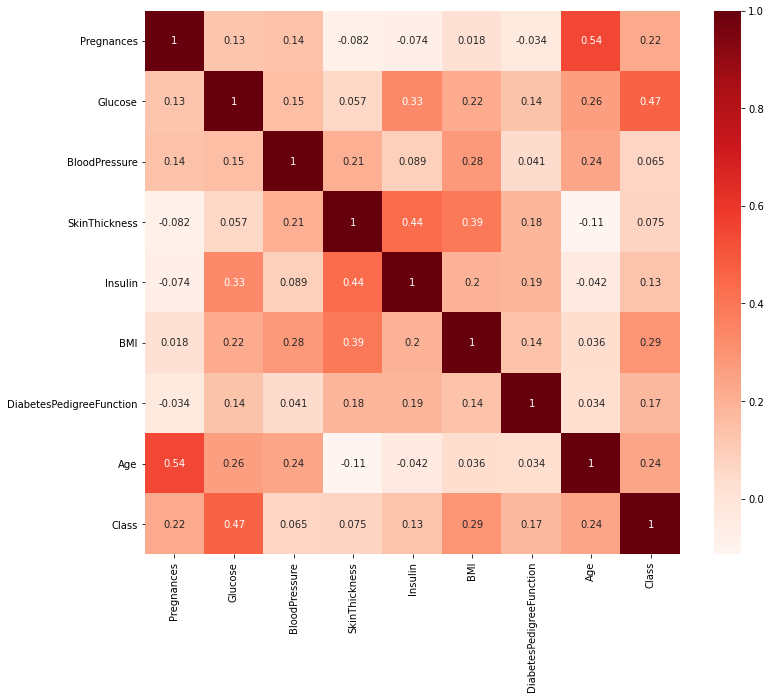

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Lets look at how much the various features are correlated using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Convert the dataframe into a set of feature vectors (X) and the class (1-diabetic 0-not diabetic).


In [5]:
array = data.values
X = array[:,0:8]
y = array[:,8]

#print out the shape of the X feature array--number of features and number of rows/examples
X.shape

(768, 8)

Before we can really evaluate feature selection methods, we need a classifier to show the impact of feature selection. We will use a support vector machine (SVM). We also need to split data into a set used to train the SVM, and a hold-out set to see how well it worked (the 'test' set). 


In [6]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm



In [7]:
#Import svm model
# define a function that will train a classifier and then measure performance

def train_and_measure_performance(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    # Model Accuracy: how often is the classifier correct?
    return (metrics.accuracy_score(y_test, y_pred))

baseline_performance = train_and_measure_performance(X, y)
print (f'Baseline accruacy with all features is {baseline_performance}')

Baseline accruacy with all features is 0.7402597402597403


There are several 'scikit' libraries for scientific python. One of these is scikit-learn for machine learning. (Another that I use is scikit-image for image processing). 
The link to the library is: https://scikit-learn.org/stable/

We will start with filter method--Chi Square

In [8]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test

# Feature extraction--select the 4 best features
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)

# Summarize scores
np.set_printoptions(precision=3)

print ("Preg       Glucose	BP   SkinThk  Insulin	BMI	  DiabPed     Age")
print(fit.scores_)



Preg       Glucose	BP   SkinThk  Insulin	BMI	  DiabPed     Age
[  87.431  895.48     7.7     10.287 1138.183   77.173    4.169  154.181]


So this means that ranked feature importance is: Insulin, Glucose, Age, BMI, Pregnancies, Skin thickness, BP, Pedigree

In [9]:
# now measure the performance
# delete the columns we don't want

chi_df = data.drop(columns=["BloodPressure","SkinThickness","DiabetesPedigreeFunction","Age", "Class"])
d_chi = chi_df.values 
X_1 = d_chi[:,:]

perf = train_and_measure_performance(X_1, y)
print (f'Accuracy with best features using Chi-square is {perf}')

# TO Do: you try adding or removing features and see the impact on performance


Accuracy with best features using Chi-square is 0.7619047619047619


Next we will apply a wrapper method--Recursive Feature Elimination or RFE

In [10]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X_train, y_train)
selector.support_
rank=selector.ranking_
print(rank)


[1 1 3 4 5 1 1 2]


In [11]:

# drop all columns not '1'
X_1 = data.drop(data.columns[8], axis=1)  # get rid of 'class'
for i in range(7):
    if rank[i] != 1:
        X_1 = X_1.drop(X_1.columns[i], axis=1)

perf = train_and_measure_performance(X_1, y)
print (f'Accuracy with best features using RFE is {perf}')

Accuracy with best features using RFE is 0.7445887445887446


In [12]:
nof=8
nof_list=np.arange(1,nof)            
high_score=0
from sklearn.linear_model import LinearRegression

score_list =[]
for n in range(nof-1):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.298316


Best alpha using built-in LassoCV: 0.020738
Best score using built-in LassoCV: 0.291466
Lasso picked 6 variables and eliminated the other 2 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

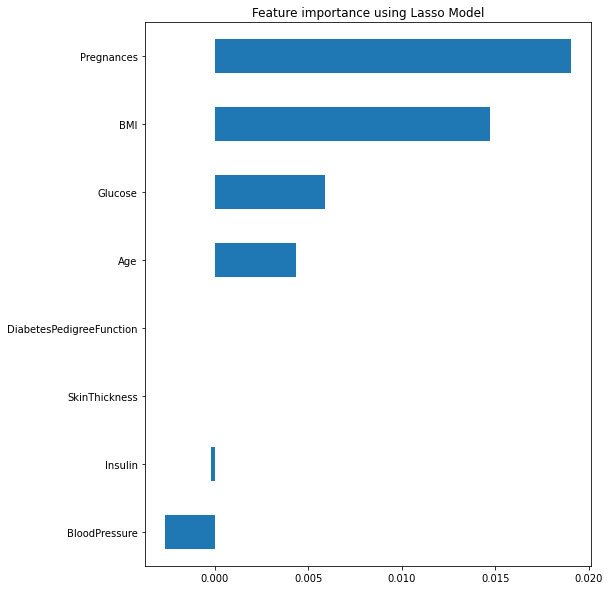

In [13]:
from sklearn.linear_model import LassoCV

reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))

coef = pd.Series(reg.coef_, index = data.columns[0:8])

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
